In [1]:
import tensorflow as tf
tf_config = tf.ConfigProto()
tf_config.gpu_options.allow_growth = True
sess = tf.Session(config=tf_config)
from keras import backend as K
K.set_session(sess)

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import display, HTML


def plot_movie_mp4(image_array):
    dpi = 2.0
    xpixels, ypixels = image_array[0].shape[0], image_array[0].shape[1]
    fig = plt.figure(figsize=(ypixels/dpi, xpixels/dpi), dpi=dpi)
    #fig = plt.figure(figsize=(1,1), dpi=dpi)
    im = plt.figimage(image_array[0])

    def animate(i):
        im.set_array(image_array[i])
        return (im,)

    anim = animation.FuncAnimation(fig, animate, frames=len(image_array))
    display(HTML(anim.to_html5_video()))

In [3]:
import os
import sys


#Adding WorldModels path to pythonpath
nb_dir = os.path.split(os.getcwd())[0]
print(nb_dir)
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
    
#Importing the VAE
from VAE.world_model_vae import VAE

/home/kaiolae/code/word_models_keras_test/WorldModels


In [4]:
#Loading Weights of trained VAE
vae = VAE()
vae.set_weights("../vae_from_large_dataset_copy/final_full_vae_weights.h5")

VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 32)   416         conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 16, 16, 32)   4128        conv2d_2[0][0]                   
_______________________

In [5]:
#Getting some data to feed into the VAE
import numpy as np
data = np.load("../data_small_episodes/obs_data_doomrnn_1.npy")

(100,)


[]

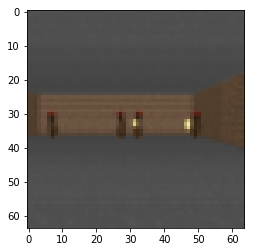

In [6]:
#Data: Dimensions are (rollout, timestep, x-axis, y-axis, colors)
print(data.shape)

selected_rollout = np.array(data[2])
selected_rollout = selected_rollout.astype('float32') / 255.
#print(selected_rollout.shape)

some_picture = selected_rollout[200]
some_picture.shape
plt.imshow(some_picture)
plt.plot()

In [7]:
latent_values_for_rollout = vae.encoder.predict(np.array(selected_rollout))
latent_values_for_rollout.shape
#Cool! We can prove that we're actually compressing things here simply by looking at the shape 

(300, 64)

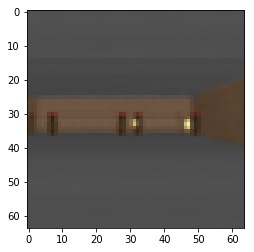

In [8]:
regenerated_images = vae.decoder.predict(latent_values_for_rollout)
plt.imshow(regenerated_images[200])

In [9]:
plot_movie_mp4(selected_rollout)
plot_movie_mp4(regenerated_images)

<Figure size 64x64 with 0 Axes>

<Figure size 64x64 with 0 Axes>